In [1]:
import snapatac2 as snap
import numpy as np
import polars as pl
import plotly.graph_objects as go
snap.__version__


'2.6.0'

In [2]:
data = snap.read("TACSHAMWT.h5ad", backed=None)
data

AnnData object with n_obs × n_vars = 6033 × 5267565
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden'
    var: 'count', 'selected'
    uns: 'doublet_rate', 'frag_size_distr', 'reference_sequences', 'scrublet_sim_doublet_score', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired'
    obsp: 'distances'

In [3]:
import scanpy as sc

In [4]:
Part6= sc.read("Part6_Visualization_umap.h5ad")

In [5]:
data = data[data.obs.index.isin(Part6.obs.index),:]

In [6]:
Part6 = Part6[Part6.obs.index.isin(data.obs.index),:]

In [131]:
Part6.obs['cell_annoation_model'] = Part6.obs['cell_annoation'].astype("str")+ "_"+Part6.obs['Model'].astype("str")

In [136]:
Part6 = Part6[Part6.obs['cell_annoation'].isin(['EndocardialEC']),:]

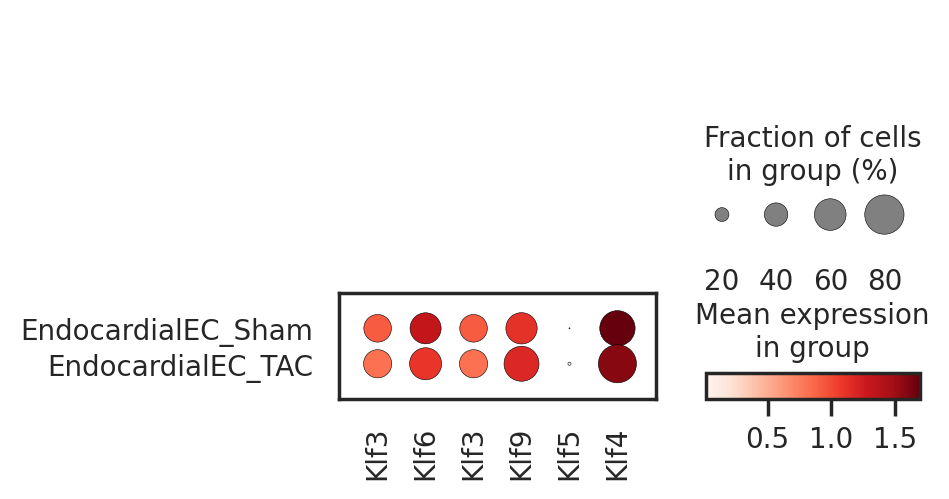

In [201]:
markers = ['Klf3','Klf6','Klf3','Klf9','Klf5','Klf4']
sc.pl.dotplot(Part6, markers, groupby='cell_annoation_model', dendrogram=True,save="pdf")

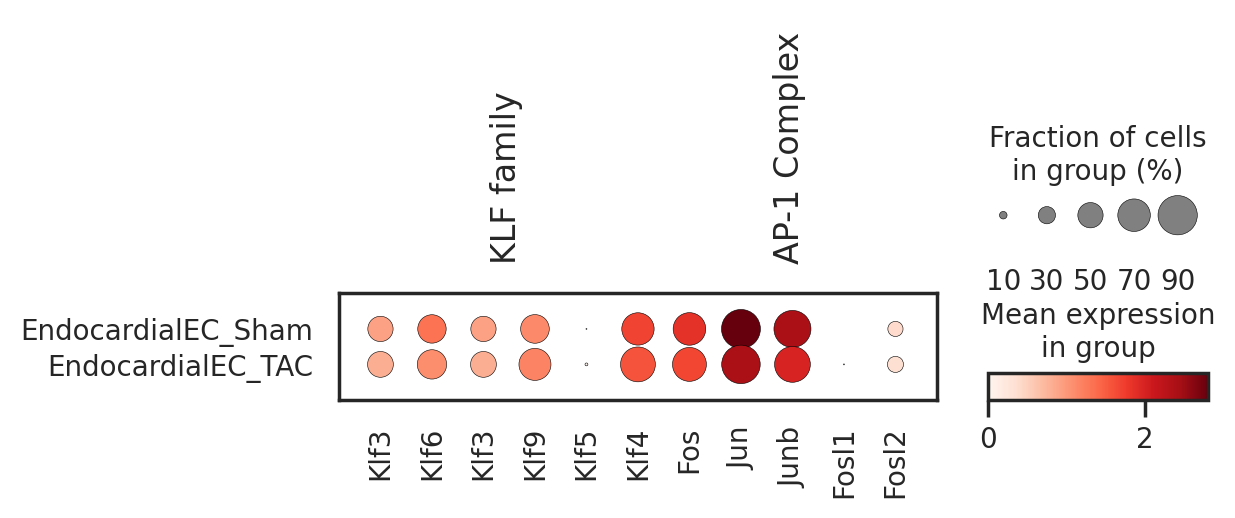

In [227]:
markers = {'KLF family':['Klf3','Klf6','Klf3','Klf9','Klf5','Klf4'],'AP-1 Complex':['Fos','Jun','Junb','Fosl1','Fosl2']}
sc.pl.dotplot(Part6, markers, groupby='cell_annoation_model', dendrogram=False,save="pdf")

In [228]:
Part6.X.A

array([[0.       , 0.       , 0.       , ..., 2.0566502, 0.       ,
        0.       ],
       [1.3692884, 0.       , 0.       , ..., 1.926451 , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.8253101, 1.8253101,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.8280805, 0.       ,
        0.       ],
       [1.2188286, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [202]:
!pwd

/home/lugli/spuccio/Projects/CNR002


In [7]:
data.shape

(3453, 5267565)

In [8]:
Part6.shape

(3453, 16440)

In [9]:
data.obsm['X_umap'] = Part6.obsm['X_umap']

/tmp/ipykernel_29433/3132862461.py:1: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  data.obsm['X_umap'] = Part6.obsm['X_umap']


In [10]:
sc.settings.set_figure_params(dpi=100, frameon=False, figsize=(5, 5), facecolor="white")

In [11]:
data.obs['cell_annoation'] = Part6.obs['cell_annoation']

In [12]:
data.obs['cell_annoation_model'] = Part6.obs['cell_annoation'].astype("str")+ "_"+Part6.obs['Model'].astype("str")

In [13]:
data.obs['cell_annoation'] = Part6.obs['cell_annoation']

In [62]:
%%time
snap.tl.macs3(data, groupby='cell_annoation_model')

2024-07-21 12:53:47 - INFO - Exporting fragments...
2024-07-21 12:54:01 - INFO - Calling peaks...
100%|██████████| 30/30 [02:20<00:00,  4.69s/it]


CPU times: user 1min 14s, sys: 6.77 s, total: 1min 20s
Wall time: 2min 35s


In [63]:
peaks.shape

(100000,)

In [64]:
%%time
peaks = snap.tl.merge_peaks(data.uns['macs3'], snap.genome.GRCm38)
peaks.head()

CPU times: user 1.1 s, sys: 128 ms, total: 1.22 s
Wall time: 1.22 s


Peaks,FibroblastLikeEC_TAC,LymphaticEC_Sham,ImmuneLikeEC_Sham,CardiomyocyteLikeEC_TAC,VenousPostCapillaryVeinEC_Sham,ValvularEC_TAC,VenousPostCapillaryVeinEC_TAC,LymphaticValvularEC_TAC,ArterialEC_Sham,ArterialEC_TAC,ValvularEC_Sham,MicrovascularEC_Sham,VenousStalksEC_Sham,MicrovascularEC_TAC,AorticEC_TAC,ProliferativeEC_Sham,LymphaticEC_TAC,EndocardialEC_Sham,AorticEC_Sham,LymphaticValvularEC_Sham,MuralLikeEC_Sham,ProliferativeEC_TAC,VenousStalksEC_TAC,MuralLikeEC_TAC,ImmuneLikeEC_TAC,EndocardialEC_TAC,InterferonEC_TAC,CardiomyocyteLikeEC_Sham,InterferonEC_Sham,FibroblastLikeEC_Sham
str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
"""chr1:3012340-3…",false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
"""chr1:3083439-3…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false
"""chr1:3121299-3…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false
"""chr1:3145958-3…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false
"""chr1:3163336-3…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


In [65]:
%%time
peak_mat = snap.pp.make_peak_matrix(data, use_rep=peaks['Peaks'])
peak_mat

CPU times: user 49.5 s, sys: 2.09 s, total: 51.6 s
Wall time: 3.37 s


AnnData object with n_obs × n_vars = 3453 × 164190
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden', 'cell_annoation', 'cell_annoation_model'

In [66]:
%%time
marker_peaks = snap.tl.marker_regions(peak_mat, groupby='cell_annoation_model', pvalue=0.05)

CPU times: user 3.74 s, sys: 120 ms, total: 3.86 s
Wall time: 3.86 s


In [67]:
peak_mat.write("peak_mat_cell_annoation_model.h5ad")

... storing 'cell_annoation_model' as categorical


In [68]:
peak_mat

AnnData object with n_obs × n_vars = 3453 × 164190
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden', 'cell_annoation', 'cell_annoation_model'

In [85]:
group1 = "EndocardialEC_TAC"
group2 = "EndocardialEC_Sham"
EndocardialEC_TAC = data.obs['cell_annoation_model'] == group1
EndocardialEC_Sham = data.obs['cell_annoation_model'] == group2
peaks_selected = np.logical_or(
    peaks[group1].to_numpy(),
    peaks[group2].to_numpy(),
)

In [87]:
%%time
diff_peaks = snap.tl.diff_test(
    peak_mat,
    cell_group1=EndocardialEC_TAC,
    cell_group2=EndocardialEC_Sham,
    features=peaks_selected,
)

2024-07-21 13:12:56 - INFO - Input contains 72227 features, now perform filtering with 'min_log_fc = 0.25' and 'min_pct = 0.05' ...
2024-07-21 13:13:02 - INFO - Testing 38118 features ...
100%|██████████| 38118/38118 [05:03<00:00, 125.65it/s]


CPU times: user 5min 8s, sys: 3.43 s, total: 5min 11s
Wall time: 5min 10s


In [93]:
diff_peaksQvalue =  diff_peaks.filter(pl.col('adjusted p-value') < 0.05)


In [129]:
diff_peaksQvalue

feature name,log2(fold_change),p-value,adjusted p-value
str,f64,f64,f64
"""chr2:98666965-…",1.356983,2.0075e-8,0.000765
"""chr11:12120415…",-1.331594,4.3532e-8,0.00083
"""chr11:85277618…",4.618534,1.4396e-7,0.001829
"""chr17:74089226…",4.068336,3.5404e-7,0.00192
"""chr3:90381750-…",5.305376,3.3100e-7,0.00192
…,…,…,…
"""chr17:34119192…",-0.629995,0.000778,0.049247
"""chr2:173659454…",-0.610808,0.000782,0.049276
"""chr5:109690598…",1.238955,0.000782,0.049276


In [128]:
pd.DataFrame(diff_peaksQvalue).to_csv("/home/lugli/spuccio/Projects/CNR002/diff_peaksQvalueEndocardial.csv",sep="\t",header=False,index=False)

In [109]:
pd.DataFrame(diff_peaksQvalue['feature name']).to_csv("/home/lugli/spuccio/Projects/CNR002/EndocardialEC.txt",header=False,index=False)

In [ ]:
pd.DataFrame(diff_peaksQvalue['feature name']).to_csv("/home/lugli/spuccio/Projects/CNR002/EndocardialEC.txt",header=False,index=False)

In [114]:
tmp1 = pd.DataFrame(diff_peaksQvalue)

In [116]:
tmp1

,0,1,2,3
0,chr2:98666965-98667466,1.356983,0.0,0.000765
1,chr11:121204159-121204660,-1.331594,0.0,0.00083
2,chr11:85277618-85278119,4.618534,0.0,0.001829
3,chr17:74089226-74089727,4.068336,0.0,0.00192
4,chr3:90381750-90382251,5.305376,0.0,0.00192
...,...,...,...,...
601,chr17:34119192-34119693,-0.629995,0.000778,0.049247
602,chr2:173659454-173659955,-0.610808,0.000782,0.049276
603,chr5:109690598-109691099,1.238955,0.000782,0.049276
604,chr7:4812506-4813007,-0.779096,0.000781,0.049276


In [118]:
EndocardialEC_Sham_Qvalue = tmp1.loc[tmp1[1] <0]

In [122]:
EndocardialEC_Sham_Qvalue[0].to_csv("/home/lugli/spuccio/Projects/CNR002/EndocardialEC_Sham_Qvalue.txt",header=False,index=False)

In [119]:
EndocardialEC_TAC_Qvalue = tmp1.loc[tmp1[1] >0]

In [123]:
EndocardialEC_TAC_Qvalue[0].to_csv("/home/lugli/spuccio/Projects/CNR002/EndocardialEC_TAC_Qvalue.txt",header=False,index=False)

In [70]:
import pandas as pd

In [71]:
for key in marker_peaks:
    print(key)

AorticEC_Sham
AorticEC_TAC
ArterialEC_Sham
ArterialEC_TAC
CardiomyocyteLikeEC_Sham
CardiomyocyteLikeEC_TAC
EndocardialEC_Sham
EndocardialEC_TAC
FibroblastLikeEC_Sham
FibroblastLikeEC_TAC
ImmuneLikeEC_Sham
ImmuneLikeEC_TAC
InterferonEC_Sham
InterferonEC_TAC
LymphaticEC_Sham
LymphaticEC_TAC
LymphaticValvularEC_Sham
LymphaticValvularEC_TAC
MicrovascularEC_Sham
MicrovascularEC_TAC
MuralLikeEC_Sham
MuralLikeEC_TAC
ProliferativeEC_Sham
ProliferativeEC_TAC
ValvularEC_Sham
ValvularEC_TAC
VenousPostCapillaryVeinEC_Sham
VenousPostCapillaryVeinEC_TAC
VenousStalksEC_Sham
VenousStalksEC_TAC


In [72]:
for key in marker_peaks:
    tmp=pd.DataFrame(marker_peaks[key])[0].str.split(':|-',expand=True)
    tmp[4] = key+tmp.index.astype(str)
    tmp[5] = "0"
    tmp[[4,0,1,2,5]].to_csv("./"+key+".bed",header=False,index=False,sep="\t")

In [34]:
import polars as pl
import plotly.graph_objects as go

In [35]:
peaks = np.concatenate([[x for x in p] for p in marker_peaks.values()]) 

In [37]:
n = len(peaks)

In [38]:
indices = np.random.choice(n, 100000, replace=False)

In [39]:
peaks = peaks[sorted(indices)]

In [40]:
from snapatac2.tools._misc import aggregate_X

In [41]:
count = aggregate_X(peak_mat, groupby='cell_annoation', normalize="RPKM")

In [42]:
count

AnnData object with n_obs × n_vars = 15 × 142445

In [43]:
names = count.obs_names

In [44]:
names

Index(['AorticEC', 'ArterialEC', 'CardiomyocyteLikeEC', 'EndocardialEC',
       'FibroblastLikeEC', 'ImmuneLikeEC', 'InterferonEC', 'LymphaticEC',
       'LymphaticValvularEC', 'MicrovascularEC', 'MuralLikeEC',
       'ProliferativeEC', 'ValvularEC', 'VenousPostCapillaryVeinEC',
       'VenousStalksEC'],
      dtype='object')

In [45]:
count = pl.DataFrame(count.X.T)

In [46]:
count.columns = list(names)

In [47]:
idx_map = {x: i for i, x in enumerate(peak_mat.var_names)}

In [48]:
idx = [idx_map[x] for x in peaks]

In [49]:
mat = np.log2(1 + count.to_numpy()[idx, :])

In [50]:
import seaborn as sns

In [51]:
import pandas as pd

In [52]:
list(peak_mat.obs['cell_annoation'].unique())

['ArterialEC',
 'LymphaticValvularEC',
 'VenousPostCapillaryVeinEC',
 'AorticEC',
 'MicrovascularEC',
 'InterferonEC',
 'VenousStalksEC',
 'ProliferativeEC',
 'LymphaticEC',
 'ValvularEC',
 'EndocardialEC',
 'FibroblastLikeEC',
 'MuralLikeEC',
 'ImmuneLikeEC',
 'CardiomyocyteLikeEC']

In [53]:
df = pd.DataFrame(mat,columns=names)

In [54]:
sns.set_style("white")

In [55]:
df.loc[~df.index.isin(df.loc[(df['CardiomyocyteLikeEC']>0) & (df['FibroblastLikeEC']>0) & (df['AorticEC']>0)  & (df['InterferonEC']>0) & (df['VenousPostCapillaryVeinEC']>0) & (df['VenousStalksEC']>0)].index)]

,AorticEC,ArterialEC,CardiomyocyteLikeEC,EndocardialEC,FibroblastLikeEC,ImmuneLikeEC,InterferonEC,LymphaticEC,LymphaticValvularEC,MicrovascularEC,MuralLikeEC,ProliferativeEC,ValvularEC,VenousPostCapillaryVeinEC,VenousStalksEC
0,2.255490,1.827183,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.377213,0.000000,0.911059,0.000000,0.0,2.111474
1,2.255490,0.887118,0.0,0.435223,0.0,0.0,0.000000,0.969059,0.0,1.646261,0.000000,0.000000,0.000000,0.0,0.500971
2,4.008976,1.432402,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.615937,0.000000,1.465113,0.868149,0.0,1.167035
3,3.383692,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.564409,0.0,0.712872,0.000000,0.000000,2.358001,0.0,0.872105
4,3.623503,2.881877,0.0,0.000000,0.0,0.0,1.799037,0.000000,0.0,0.712872,0.000000,1.465113,1.406340,0.0,0.500971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.736052,2.269826,0.0,0.435223,0.0,0.0,0.000000,2.121503,0.0,1.046217,1.931002,0.911059,1.406340,0.0,2.853494
99996,0.000000,1.432402,0.0,0.000000,0.0,0.0,2.575253,0.564409,0.0,2.174679,0.000000,0.000000,0.000000,0.0,2.853494
99997,0.000000,0.510698,0.0,0.000000,0.0,0.0,0.000000,1.762947,0.0,0.400026,0.000000,1.465113,0.000000,0.0,3.010390
99998,1.529812,1.432402,0.0,0.769128,0.0,0.0,1.799037,2.533019,0.0,1.646261,2.728226,2.651351,0.868149,0.0,3.217745


In [56]:
df.loc[(df['CardiomyocyteLikeEC']>0) & (df['FibroblastLikeEC']>0) & (df['AorticEC']>0)  & (df['InterferonEC']>0) & (df['VenousPostCapillaryVeinEC']>0) & (df['VenousStalksEC']>0)].index

Index([    7,    11,    48,    50,    53,    61,    68,    88,    93,    97,
       ...
       98147, 98350, 98559, 98798, 98932, 99079, 99119, 99367, 99390, 99404],
      dtype='int64', length=10042)

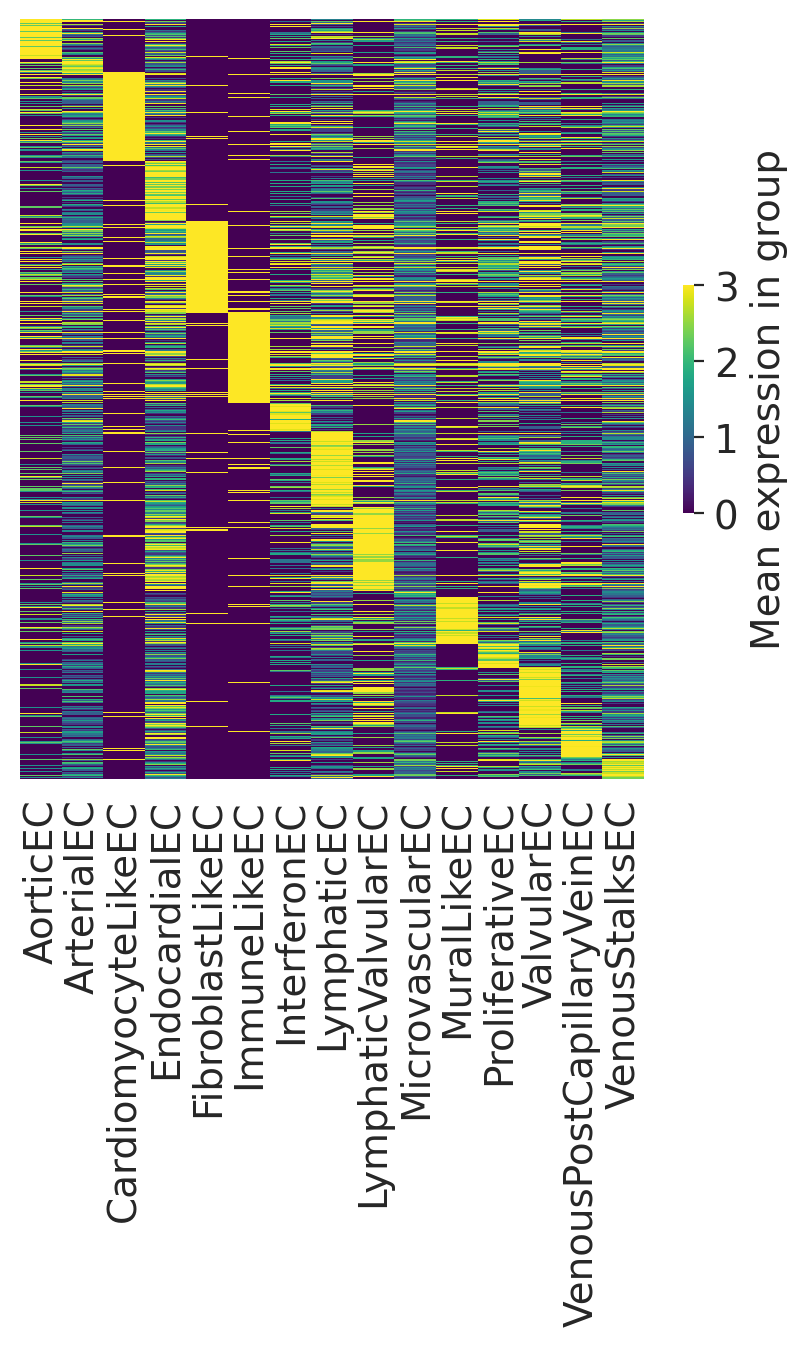

In [57]:
g = sns.heatmap(df.loc[~df.index.isin(df.loc[(df['AorticEC']>0) & (df['CardiomyocyteLikeEC']>0) & (df['FibroblastLikeEC']>0) & (df['ImmuneLikeEC']>0)  & (df['InterferonEC']>0) & (df['LymphaticEC']>0)  & (df['LymphaticValvularEC']>0) & (df['MicrovascularEC']>0)  & (df['ProliferativeEC']>0)& (df['VenousPostCapillaryVeinEC']>0) & (df['VenousStalksEC']>0)].index)],vmin=0,vmax=3, annot=False,yticklabels=False,cmap="viridis",
           cbar_kws={"ticks":[0,1,2,3],
                     "shrink": 0.3,
                     "label": "Mean expression in group"})

fig = g.get_figure()
fig.savefig('heatmap_atac.pdf', dpi=100, bbox_inches='tight')

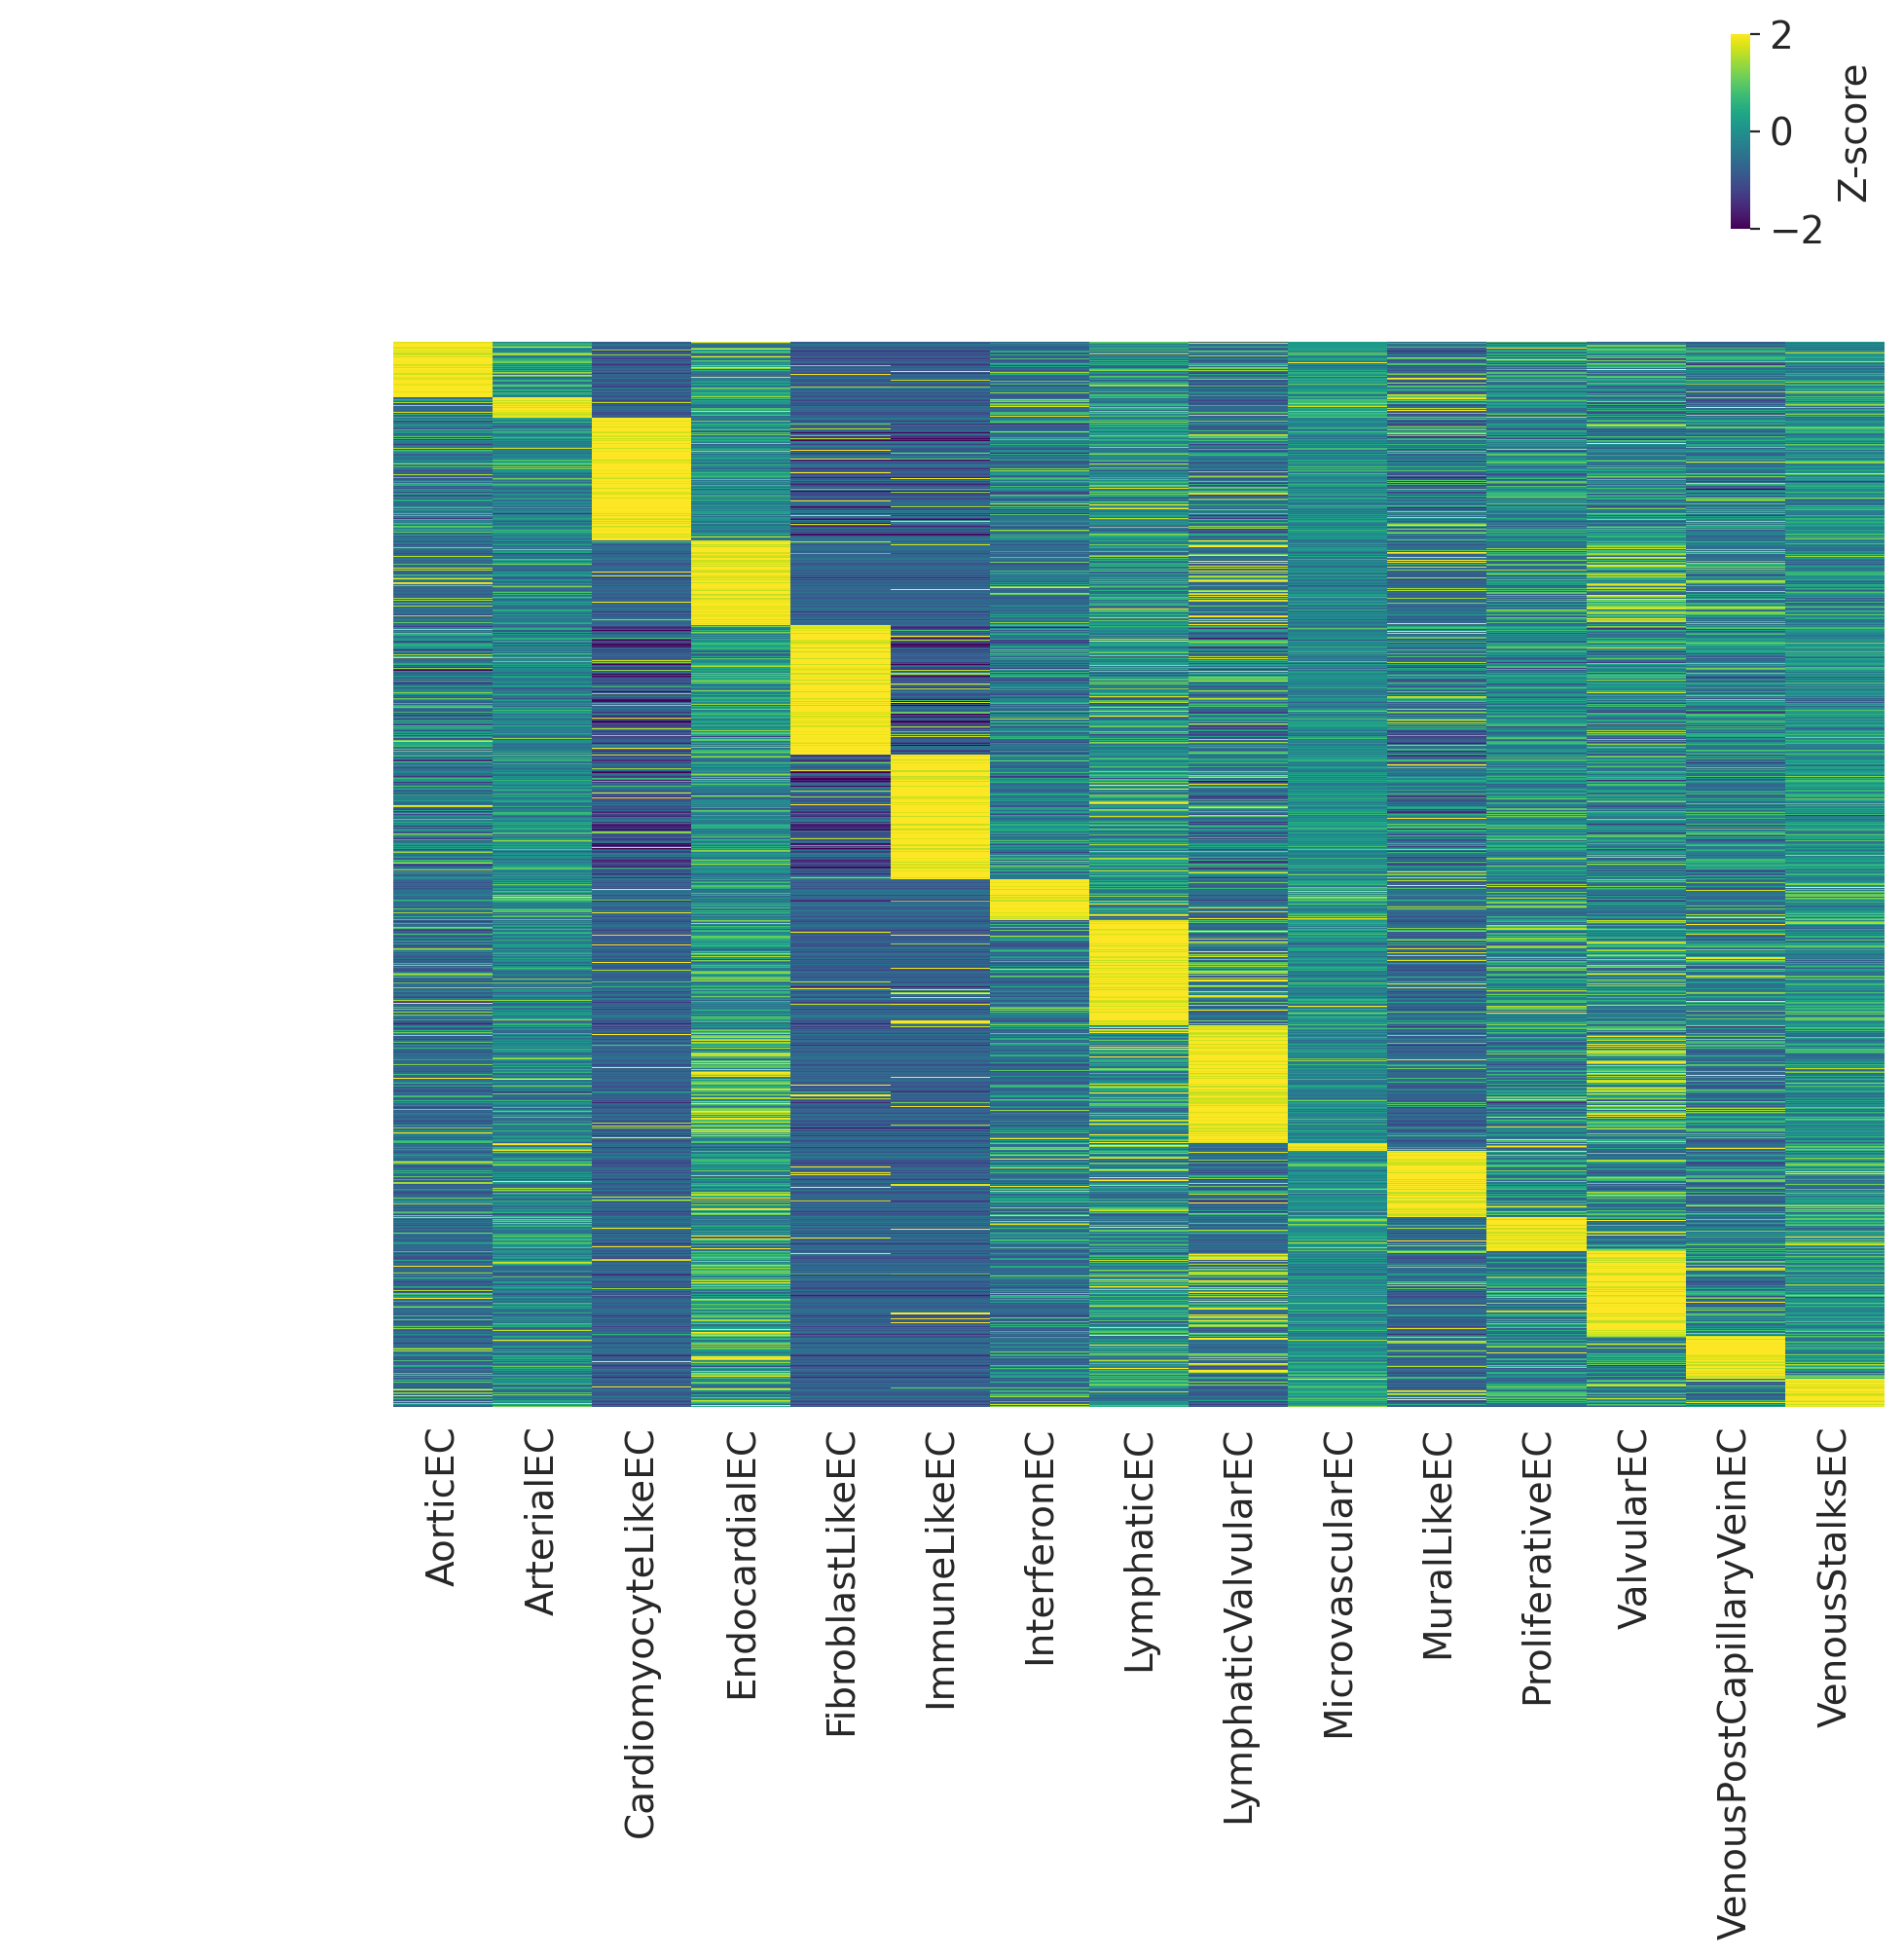

In [59]:
sns.clustermap(df.loc[~df.index.isin(df.loc[(df['AorticEC']>0) & (df['CardiomyocyteLikeEC']>0) & (df['FibroblastLikeEC']>0) & (df['ImmuneLikeEC']>0)  & (df['InterferonEC']>0) & (df['LymphaticEC']>0)  & (df['LymphaticValvularEC']>0) & (df['MicrovascularEC']>0)  & (df['ProliferativeEC']>0)& (df['VenousPostCapillaryVeinEC']>0) & (df['VenousStalksEC']>0)].index)],
              z_score=0,row_cluster=False,col_cluster=False,yticklabels=False,cmap="viridis",vmin=-2,vmax=2,
              cbar_kws={"ticks":[-2,0,2],"shrink": 0.1,"label": "Z-score"},
                  cbar_pos=(0.9, 0.9, 0.01, 0.1))
#g.savefig('heatmap4.pdf', dpi=100, bbox_inches='tight', transparent=False)

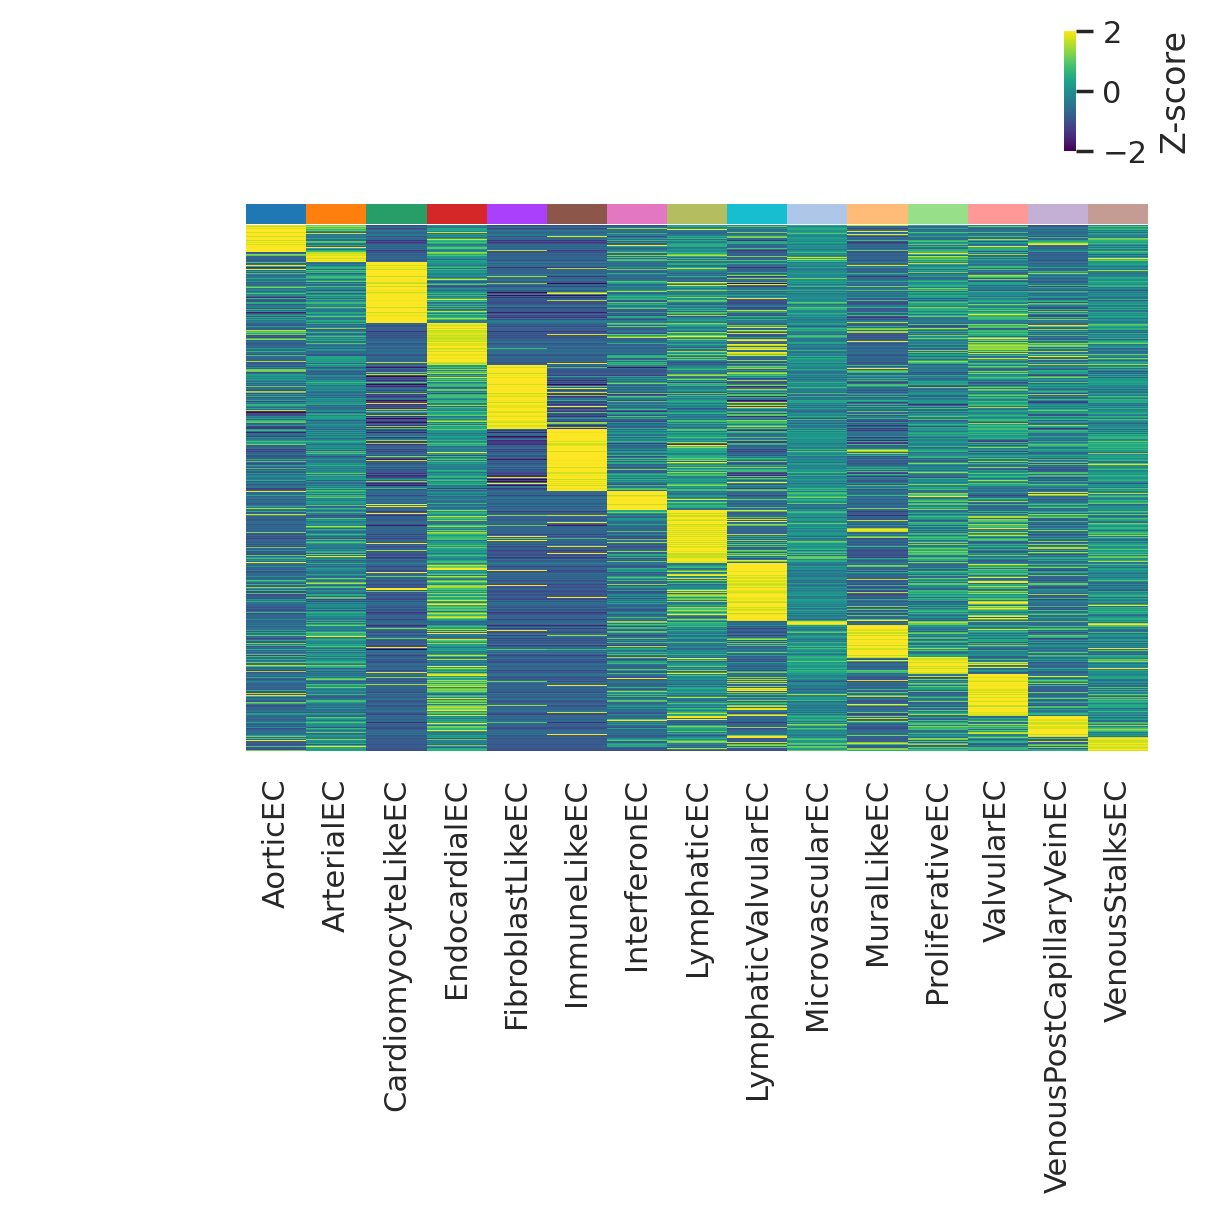

In [60]:
sns.set_theme(style='white')
lut = dict(zip(df.columns, ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94']))
row_colors = df.columns.map(lut)
g=sns.clustermap(df.loc[~df.index.isin(df.loc[(df['AorticEC']>0) & (df['CardiomyocyteLikeEC']>0) & (df['FibroblastLikeEC']>0) & (df['ImmuneLikeEC']>0)  & (df['InterferonEC']>0) & (df['LymphaticEC']>0)  & (df['LymphaticValvularEC']>0) & (df['MicrovascularEC']>0)  & (df['ProliferativeEC']>0)& (df['VenousPostCapillaryVeinEC']>0) & (df['VenousStalksEC']>0)].index)],
              z_score=0,row_cluster=False,col_cluster=False,yticklabels=False,cmap="viridis",vmin=-2,vmax=2,col_colors=row_colors,
              cbar_kws={"ticks":[-2,0,2],"shrink": 0.1,"label": "Z-score"},
                  cbar_pos=(0.9, 0.9, 0.01, 0.1),figsize=(6,6))
g.savefig('heatmap3.png', dpi=300, bbox_inches='tight', transparent=False,format="png")

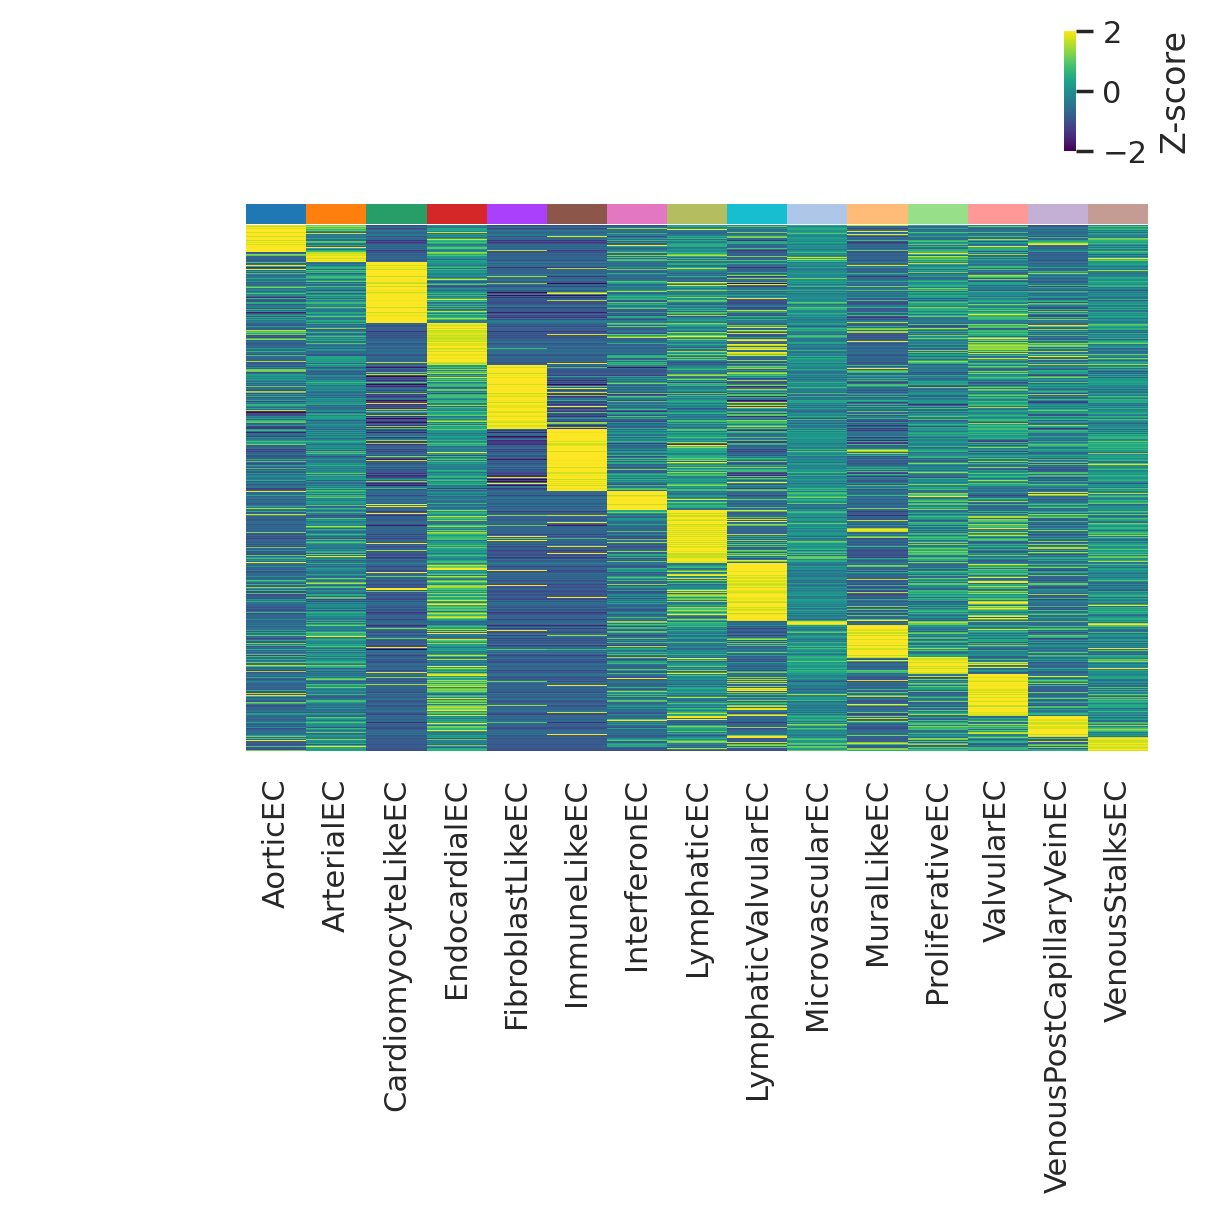

In [61]:
sns.set_theme(style='white')
lut = dict(zip(df.columns, ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94']))
row_colors = df.columns.map(lut)
g=sns.clustermap(df.loc[~df.index.isin(df.loc[(df['AorticEC']>0) & (df['CardiomyocyteLikeEC']>0) & (df['FibroblastLikeEC']>0) & (df['ImmuneLikeEC']>0)  & (df['InterferonEC']>0) & (df['LymphaticEC']>0)  & (df['LymphaticValvularEC']>0) & (df['MicrovascularEC']>0)  & (df['ProliferativeEC']>0)& (df['VenousPostCapillaryVeinEC']>0) & (df['VenousStalksEC']>0)].index)],
              z_score=0,row_cluster=False,col_cluster=False,yticklabels=False,cmap="viridis",vmin=-2,vmax=2,col_colors=row_colors,
              cbar_kws={"ticks":[-2,0,2],"shrink": 0.1,"label": "Z-score"},
                  cbar_pos=(0.9, 0.9, 0.01, 0.1),figsize=(6,6))
g.savefig('heatmap3.pdf', dpi=300, bbox_inches='tight', transparent=False,format="pdf")

In [17]:
snap.pl.regions(peak_mat, groupby='cell_annoation', peaks=marker_peaks, interactive=False,
               show=False,out_file="/home/lugli/spuccio/Projects/CNR002/figures/atac_heatmap.pdf")

In [84]:
?snap.tl.motif_enrichment

Signature:
snap.tl.motif_enrichment(
    motifs: 'list[PyDNAMotif]',
    regions: 'dict[str, list[str]]',
    genome_fasta: 'Path | Genome',
    background: 'list[str] | None' = None,
    method: "Literal['binomial', 'hypergeometric'] | None" = None,
) -> "dict[str, 'polars.DataFrame']"
Docstring:
Identify enriched transcription factor motifs.

Parameters
----------
motifs
    A list of transcription factor motifs.
regions
    Groups of regions. Each group will be tested independently against the background.
genome_fasta
    A fasta file containing the genome sequences or a Genome object.
background
    A list of regions to be used as the background. If None, the union of elements
    in `regions` will be used as the background.
method
    Statistical testing method: "binomial" or "hypergeometric".
    To use "hypergeometric", the testing regions must be a subset of
    background regions.

Returns
-------
dict[str, pl.DataFrame]:
    Dataframes containing the enrichment analysis resul

In [73]:
%%time
motifs = snap.tl.motif_enrichment(
    motifs=snap.datasets.cis_bp(unique=True),
    regions=marker_peaks,
    genome_fasta=snap.genome.GRCm38,
)

2024-07-21 12:56:32 - INFO - Fetching 123188 sequences ...
2024-07-21 12:56:55 - INFO - Computing enrichment ...
100%|██████████| 1165/1165 [09:24<00:00,  2.06it/s]

CPU times: user 3h 35min 7s, sys: 31.7 s, total: 3h 35min 39s
Wall time: 9min 47s


In [74]:
snap.pl.motif_enrichment(motifs, max_fdr=0.05, height=1600,min_log_fc=1,show=False,scale=100,
                         interactive=False,out_file="/home/lugli/spuccio/Projects/CNR002/figures/motifs_heatmap.html")

In [75]:
motifs

{'AorticEC_Sham': shape: (1_165, 6)
 ┌────────────────────────┬────────────┬────────┬───────────────────┬──────────┬──────────────────┐
 │ id                     ┆ name       ┆ family ┆ log2(fold change) ┆ p-value  ┆ adjusted p-value │
 │ ---                    ┆ ---        ┆ ---    ┆ ---               ┆ ---      ┆ ---              │
 │ str                    ┆ str        ┆ null   ┆ f64               ┆ f64      ┆ f64              │
 ╞════════════════════════╪════════════╪════════╪═══════════════════╪══════════╪══════════════════╡
 │ AC023509.3+M02872_2.00 ┆ AC023509.3 ┆ null   ┆ 0.106321          ┆ 0.282403 ┆ 0.377293         │
 │ AC138696.1+M04597_2.00 ┆ AC138696.1 ┆ null   ┆ -0.071908         ┆ 0.337219 ┆ 0.412069         │
 │ AHR+M09817_2.00        ┆ AHR        ┆ null   ┆ -0.515636         ┆ 0.132284 ┆ 0.248485         │
 │ AIRE+M09375_2.00       ┆ AIRE       ┆ null   ┆ 0.312411          ┆ 0.002801 ┆ 0.017448         │
 │ ALX1+M05327_2.00       ┆ ALX1       ┆ null   ┆ 0.077714      

In [88]:
EndocardialEC_TACtmp = pd.DataFrame(motifs['EndocardialEC_TAC'])

In [89]:
EndocardialEC_Shamtmp = pd.DataFrame(motifs['EndocardialEC_Sham'])

In [76]:
import pandas as pd

In [77]:
df = pd.DataFrame()


In [78]:
for key in motifs:
    tmp = pd.DataFrame(motifs[key])
    tmp['cluster'] = key
    df = pd.concat([df,tmp])

In [79]:
df.columns=['id', 'name', 'family', 'log2(fold change)', 'p-value', 'adjusted p-value', 'cluster']

In [81]:
df2 = df.loc[df['name'].isin(["KLF7","ZNF30","ZNF441","ZNF783","ZFX","ZNF311","KLF15",
                        "ZNF100","CTCFL","SP5","SP8","SP9","WT1","ZNF543","ZFY","DNMT1","ZFP64","ZNF200","NRF1","ZSCAN10","SP7","ZNF283","MBD2","ZBTB7A","ZNF610","SP6","ZNF541","KLF6","TCFL5","GABPA","ZNF267","ZNF548","ZNF611","ZBTB7C","ZNF566","CEBPZ","HES1","YY2","KLF3","ZEB1","ETV6","EHF","ELF4","USF2","CEBPA","ZNF765","ZNF454","ZNF486","ELF1","ZBTB33","ETV1","ETV3L","YY1","ZNF2","TFDP3","TFDP1","TFDP2",
                        "JUNB","FOSL2","NFE2","ZBTB18","MYOG","RFX4","SOX13","MYOD1","TGIF2LX","ZBTB12","ZNF460","EBF1","EBF3"])]

In [82]:
df3 = df2.groupby(['cluster','name'])[['adjusted p-value']].apply(lambda x: x).reset_index()

In [83]:
df4 = df3.loc[df3['cluster']=="AorticEC"]

In [128]:
del df4['level_2']

In [208]:
df

,id,name,family,log2(fold change),p-value,adjusted p-value,cluster
0,AC023509.3+M02872_2.00,AC023509.3,None,0.207186,0.22324,0.352405,AorticEC_Sham
1,AC138696.1+M04597_2.00,AC138696.1,None,-0.298354,0.115763,0.253355,AorticEC_Sham
2,AHR+M09817_2.00,AHR,None,-1.109568,0.107444,0.246403,AorticEC_Sham
3,AIRE+M09375_2.00,AIRE,None,0.442849,0.001665,0.020904,AorticEC_Sham
4,ALX1+M05327_2.00,ALX1,None,0.287889,0.043667,0.150601,AorticEC_Sham
...,...,...,...,...,...,...,...
1160,ZSCAN4+M02919_2.00,ZSCAN4,None,-0.314392,0.083147,0.350175,VenousStalksEC_TAC
1161,ZSCAN5+M04460_2.00,ZSCAN5,None,-0.117761,0.377427,0.507346,VenousStalksEC_TAC
1162,ZSCAN5C+M08390_2.00,ZSCAN5C,None,0.179174,0.227831,0.458306,VenousStalksEC_TAC
1163,ZSCAN9+M04466_2.00,ZSCAN9,None,0.02937,0.406863,0.507346,VenousStalksEC_TAC


In [168]:
df4 = df.loc[df['cluster']=='VenousStalksEC_TAC']

In [169]:
df4

,id,name,family,log2(fold change),p-value,adjusted p-value,cluster
0,AC023509.3+M02872_2.00,AC023509.3,None,-1.019015,0.141048,0.401763,VenousStalksEC_TAC
1,AC138696.1+M04597_2.00,AC138696.1,None,0.018587,0.415843,0.507346,VenousStalksEC_TAC
2,AHR+M09817_2.00,AHR,None,-0.418232,0.498524,0.535775,VenousStalksEC_TAC
3,AIRE+M09375_2.00,AIRE,None,-0.001698,0.548481,0.562483,VenousStalksEC_TAC
4,ALX1+M05327_2.00,ALX1,None,0.16365,0.241049,0.461575,VenousStalksEC_TAC
...,...,...,...,...,...,...,...
1160,ZSCAN4+M02919_2.00,ZSCAN4,None,-0.314392,0.083147,0.350175,VenousStalksEC_TAC
1161,ZSCAN5+M04460_2.00,ZSCAN5,None,-0.117761,0.377427,0.507346,VenousStalksEC_TAC
1162,ZSCAN5C+M08390_2.00,ZSCAN5C,None,0.179174,0.227831,0.458306,VenousStalksEC_TAC
1163,ZSCAN9+M04466_2.00,ZSCAN9,None,0.02937,0.406863,0.507346,VenousStalksEC_TAC


In [81]:
df5 = df.T
df5.columns =  df5.iloc[-1]
df5 = df5.drop(df5.index[-1])

In [83]:
df5.T

,id,name,family,log2(fold change),p-value,adjusted p-value
cluster,,,,,,
AorticEC_Sham,AC023509.3+M02872_2.00,AC023509.3,None,0.106321,0.282403,0.377293
AorticEC_Sham,AC138696.1+M04597_2.00,AC138696.1,None,-0.071908,0.337219,0.412069
AorticEC_Sham,AHR+M09817_2.00,AHR,None,-0.515636,0.132284,0.248485
AorticEC_Sham,AIRE+M09375_2.00,AIRE,None,0.312411,0.002801,0.017448
AorticEC_Sham,ALX1+M05327_2.00,ALX1,None,0.077714,0.260824,0.365867
...,...,...,...,...,...,...
VenousStalksEC_TAC,ZSCAN4+M02919_2.00,ZSCAN4,None,0.101131,0.152545,0.279426
VenousStalksEC_TAC,ZSCAN5+M04460_2.00,ZSCAN5,None,-0.161825,0.142198,0.27202
VenousStalksEC_TAC,ZSCAN5C+M08390_2.00,ZSCAN5C,None,0.086001,0.269556,0.375189


In [184]:
    df4 = df.loc[df['cluster']=="AorticEC_Sham"]
    #del df4['level_2']
    df5 = df4.T
    df5.columns =  df5.iloc[-1]
    df5 = df5.drop(df5.index[-1])
    df5 = df5.T

In [187]:
#del df5['cluster']

In [193]:
del df5['id']

In [196]:
df5 = df5.reset_index()

In [197]:
df5

,cluster,name,family,log2(fold change),p-value,adjusted p-value
0,AorticEC_Sham,AC023509.3,None,0.207186,0.22324,0.352405
1,AorticEC_Sham,AC138696.1,None,-0.298354,0.115763,0.253355
2,AorticEC_Sham,AHR,None,-1.109568,0.107444,0.246403
3,AorticEC_Sham,AIRE,None,0.442849,0.001665,0.020904
4,AorticEC_Sham,ALX1,None,0.287889,0.043667,0.150601
...,...,...,...,...,...,...
1160,AorticEC_Sham,ZSCAN4,None,-0.053425,0.358455,0.441603
1161,AorticEC_Sham,ZSCAN5,None,-0.341593,0.034411,0.142409
1162,AorticEC_Sham,ZSCAN5C,None,-0.038232,0.459965,0.490023
1163,AorticEC_Sham,ZSCAN9,None,0.14735,0.142139,0.284851


In [216]:
df_final=pd.DataFrame()
with pd.ExcelWriter('TF_atac_second_export.xlsx') as writer:
    for key in motifs:
        df4 = df.loc[df['cluster']==key]
        #del df4['level_2']
        df5 = df4.T
        df5.columns =  df5.iloc[-1]
        df5 = df5.drop(df5.index[-1])
        df5 = df5.T
        del df5['id']
        df5 = df5.reset_index()
        df5 = df5.loc[df5['cluster'].isin([key])]
        del df5['family']
        df5 = df5.loc[df5['adjusted p-value']<0.05]
        df5.to_excel(writer, sheet_name=key,index=False)
    #df_final = pd.concat([df_final, df5], axis=1)


In [215]:
!pwd

/home/lugli/spuccio/Projects/CNR002


In [204]:
motifs

{'AorticEC_Sham': shape: (1_165, 6)
 ┌────────────────────────┬────────────┬────────┬───────────────────┬──────────┬──────────────────┐
 │ id                     ┆ name       ┆ family ┆ log2(fold change) ┆ p-value  ┆ adjusted p-value │
 │ ---                    ┆ ---        ┆ ---    ┆ ---               ┆ ---      ┆ ---              │
 │ str                    ┆ str        ┆ null   ┆ f64               ┆ f64      ┆ f64              │
 ╞════════════════════════╪════════════╪════════╪═══════════════════╪══════════╪══════════════════╡
 │ AC023509.3+M02872_2.00 ┆ AC023509.3 ┆ null   ┆ 0.207186          ┆ 0.22324  ┆ 0.352405         │
 │ AC138696.1+M04597_2.00 ┆ AC138696.1 ┆ null   ┆ -0.298354         ┆ 0.115763 ┆ 0.253355         │
 │ AHR+M09817_2.00        ┆ AHR        ┆ null   ┆ -1.109568         ┆ 0.107444 ┆ 0.246403         │
 │ AIRE+M09375_2.00       ┆ AIRE       ┆ null   ┆ 0.442849          ┆ 0.001665 ┆ 0.020904         │
 │ ALX1+M05327_2.00       ┆ ALX1       ┆ null   ┆ 0.287889      

In [131]:
import numpy as np

In [138]:
df_final = df_final.astype(float)

In [140]:
sns.set_theme(style='white')

In [151]:
dict(zip(df_final.columns, ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94']))

{'AorticEC': '#1f77b4',
 'ArterialEC': '#ff7f0e',
 'CardiomyocyteLikeEC': '#279e68',
 'EndocardialEC': '#d62728',
 'FibroblastLikeEC': '#aa40fc',
 'ImmuneLikeEC': '#8c564b',
 'InterferonEC': '#e377c2',
 'LymphaticEC': '#b5bd61',
 'LymphaticValvularEC': '#17becf',
 'MicrovascularEC': '#aec7e8',
 'MuralLikeEC': '#ffbb78',
 'ProliferativeEC': '#98df8a',
 'ValvularEC': '#ff9896',
 'VenousPostCapillaryVeinEC': '#c5b0d5',
 'VenousStalksEC': '#c49c94'}

In [ ]:
tab10

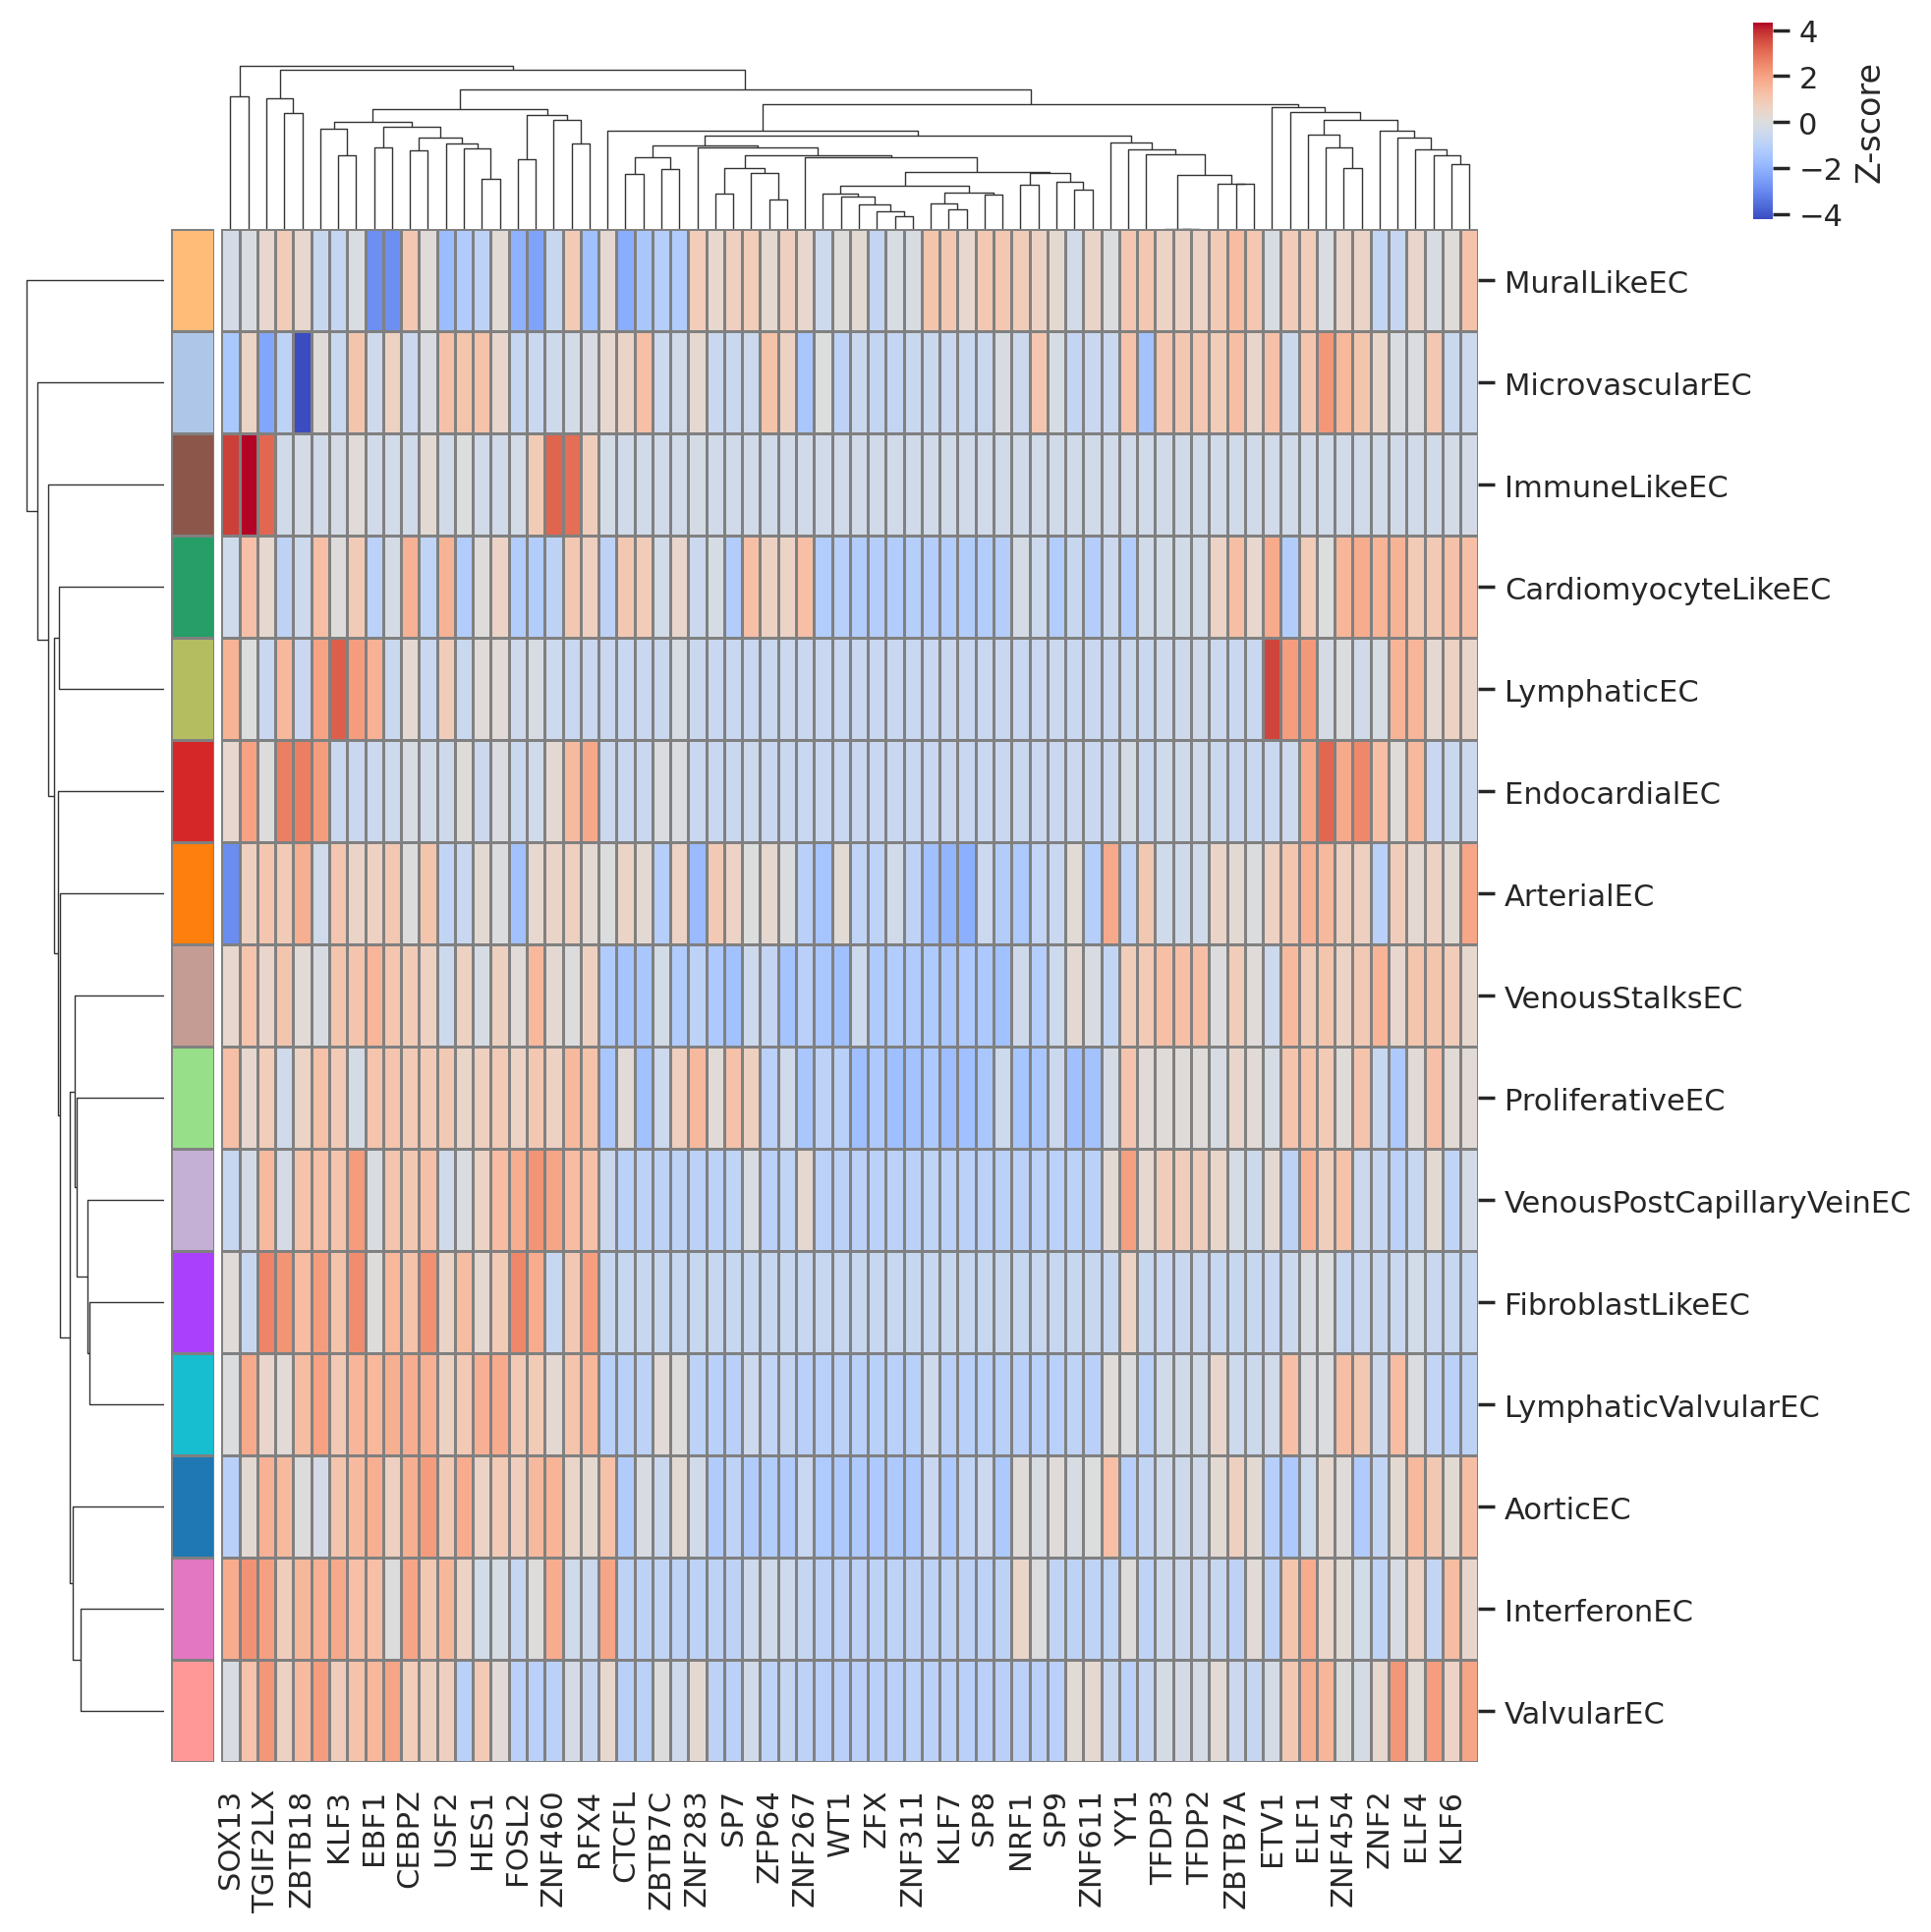

In [208]:
lut = dict(zip(df_final.columns, ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94']))
row_colors = df_final.columns.map(lut)
g = sns.clustermap(df_final.T,z_score=0, cmap="coolwarm",row_colors=row_colors,dendrogram_ratio=0.1,
              cbar_kws={"ticks":[-4,-2,0,2,4],"shrink": 0.1,"label": "Z-score"},linewidths=0.5,linecolor="grey",
                  cbar_pos=(0.9, 0.9, 0.01, 0.1))
#g.cax.set_visible(False)
g.ax_heatmap.set_ylabel("");
g.ax_heatmap.set_xlabel("")
g.savefig('heatmap2.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [209]:
!pwd

/home/lugli/spuccio/Projects/CNR002


In [154]:
df_final.columns

NameError: name 'df_final' is not defined

In [ ]:
{'AorticEC':['Fbln5','Fbln2'], 'ArterialEC':['Cxcl12','Ly6c1','Mgll'], 'CardiomyocyteLikeEC':['Tpm1','Myl2','Tnni3'], 'EndocardialEC':['Mgp','Cpe','Cfh'],
       'FibroblastLikeEC':['Col3a1','Bgn'], 'ImmuneLikeEC':['Fcer1g','C1qa','Lyz2'], 'InterferonEC':['Ifit2','Ly6a','Ifit3'], 'LymphaticEC':['Flt4','Timp2'],
       'LymphaticValvularEC':['Dcn','Ece1'], 'MicrovascularEC':['Sparcl1','Gpihbp1'], 'MuralLikeEC':['Rgs5','Cox4i2','Cald1'],
       'ProliferativeEC':['Stmn1','Mki67','Top2a'], 'ValvularEC':['Ptgis','Cgnl1'], 'VenousPostCapillaryVeinEC':['Vwf','Eln'],
       'VenousStalksEC':['Vegfc','Calcrl'] }

In [86]:
df_final.T.to_csv("TF_table_model.csv",header=True,index=True)

In [73]:
with pd.ExcelWriter("MarkerPeaks_CellAnnotation_Model.xlsx") as writer:
    for key in marker_peaks:
        tmp =pd.read_csv(key+".txt",sep="\t",header=0)
        tmp.columns = ['PeakID', 'Chr',
       'Start', 'End', 'Strand', 'Peak Score', 'Focus Ratio/Region Size',
       'Annotation', 'Detailed Annotation', 'Distance to TSS',
       'Nearest PromoterID', 'Entrez ID', 'Nearest Unigene', 'Nearest Refseq',
       'Nearest Ensembl', 'Gene Name', 'Gene Alias', 'Gene Description',
       'Gene Type']
        tmp= tmp[['PeakID', 'Chr','Start', 'End','Annotation','Distance to TSS','Gene Name','Gene Description','Gene Type']]
        tmp.to_excel(writer, sheet_name=key, index=False,header=True)

In [72]:
pd.read_csv(key+".txt",sep="\t",header=0).columns

Index(['PeakID (cmd=annotatePeaks.pl VenousStalksEC_TAC.bed mm10)', 'Chr',
       'Start', 'End', 'Strand', 'Peak Score', 'Focus Ratio/Region Size',
       'Annotation', 'Detailed Annotation', 'Distance to TSS',
       'Nearest PromoterID', 'Entrez ID', 'Nearest Unigene', 'Nearest Refseq',
       'Nearest Ensembl', 'Gene Name', 'Gene Alias', 'Gene Description',
       'Gene Type'],
      dtype='object')

In [ ]:
	TAC	SHAM
Intron 	187	29
Exon   	10	4
Promoter       	20	170
Intergenic     	151	35

In [148]:
data = [['Intron', 187,29], ['Exon', 10,4], ['Promoter', 20,170],['Intergenic', 151,35]]

In [155]:
df_x = pd.DataFrame(data)

In [158]:
df_x = df_x.set_index(0)

In [164]:
df_x.columns=['TAC','Sham']

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

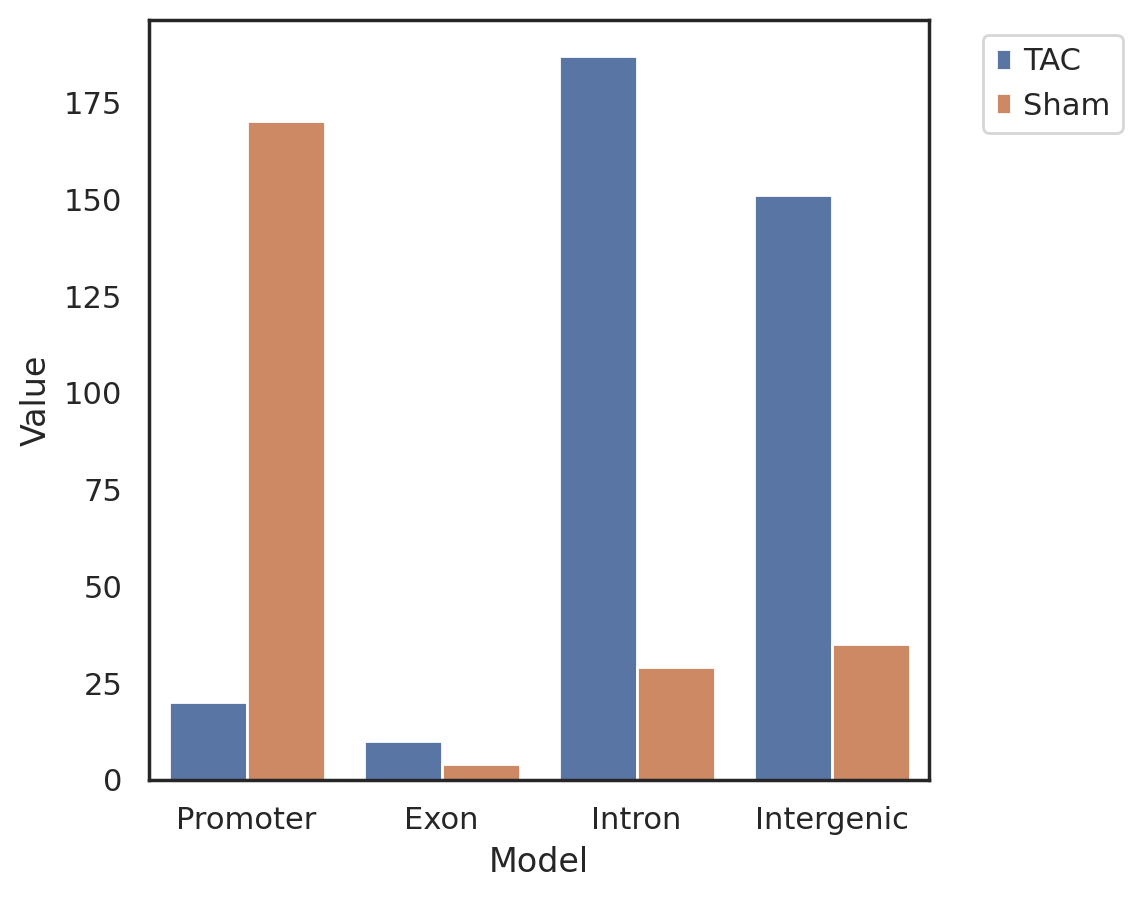

In [173]:
df = pd.DataFrame(data, columns=['Model', 'TAC', 'Sham'])

# Step 2: Melt the DataFrame to have a suitable format for seaborn
df_melted = df.melt(id_vars='Model', var_name='Type', value_name='Value')

# Step 3: Create the bar plot
sns.barplot(data=df_melted, x='Model', y='Value', hue='Type',order=['Promoter','Exon','Intron','Intergenic'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

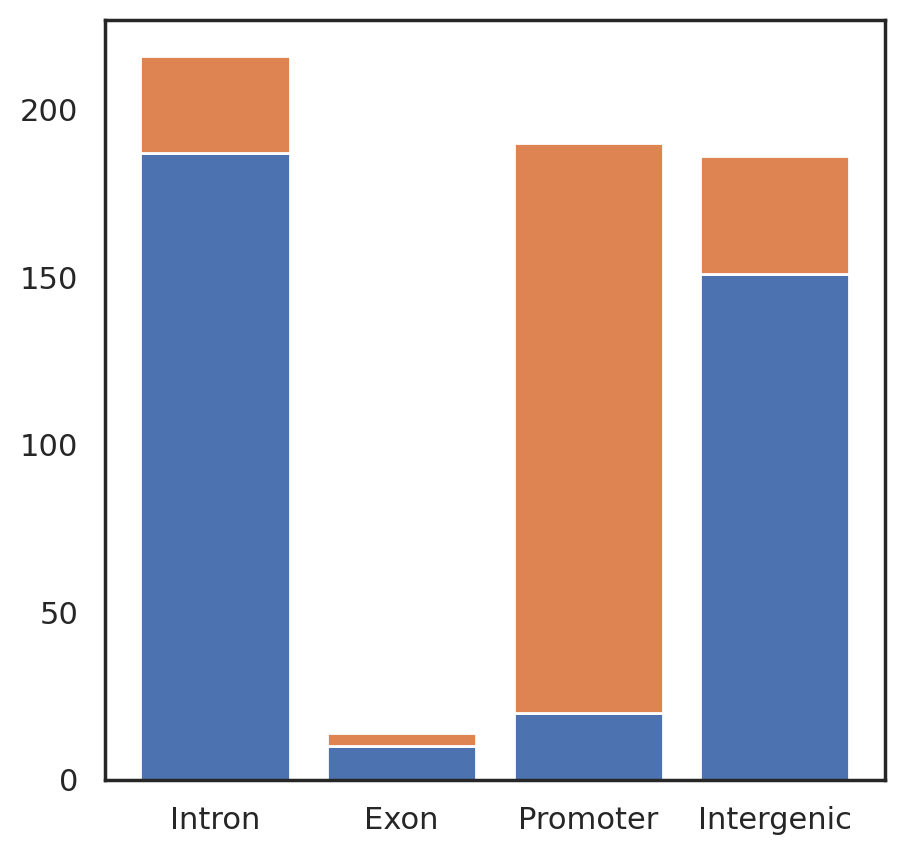

In [174]:
bottom_bar = plt.bar(df['Model'], df['TAC'], label='TAC')
top_bar = plt.bar(df['Model'], df['Sham'], bottom=df['TAC'], label='Sham')

In [185]:
data2 = [['Intron', 187,29], ['Exon', 10,4], ['Promoter', 20,170],['Intergenic', 151,35]]

In [189]:
df_x. 238

,TAC,Sham
0,,
Intron,187,29
Exon,10,4
Promoter,20,170
Intergenic,151,35


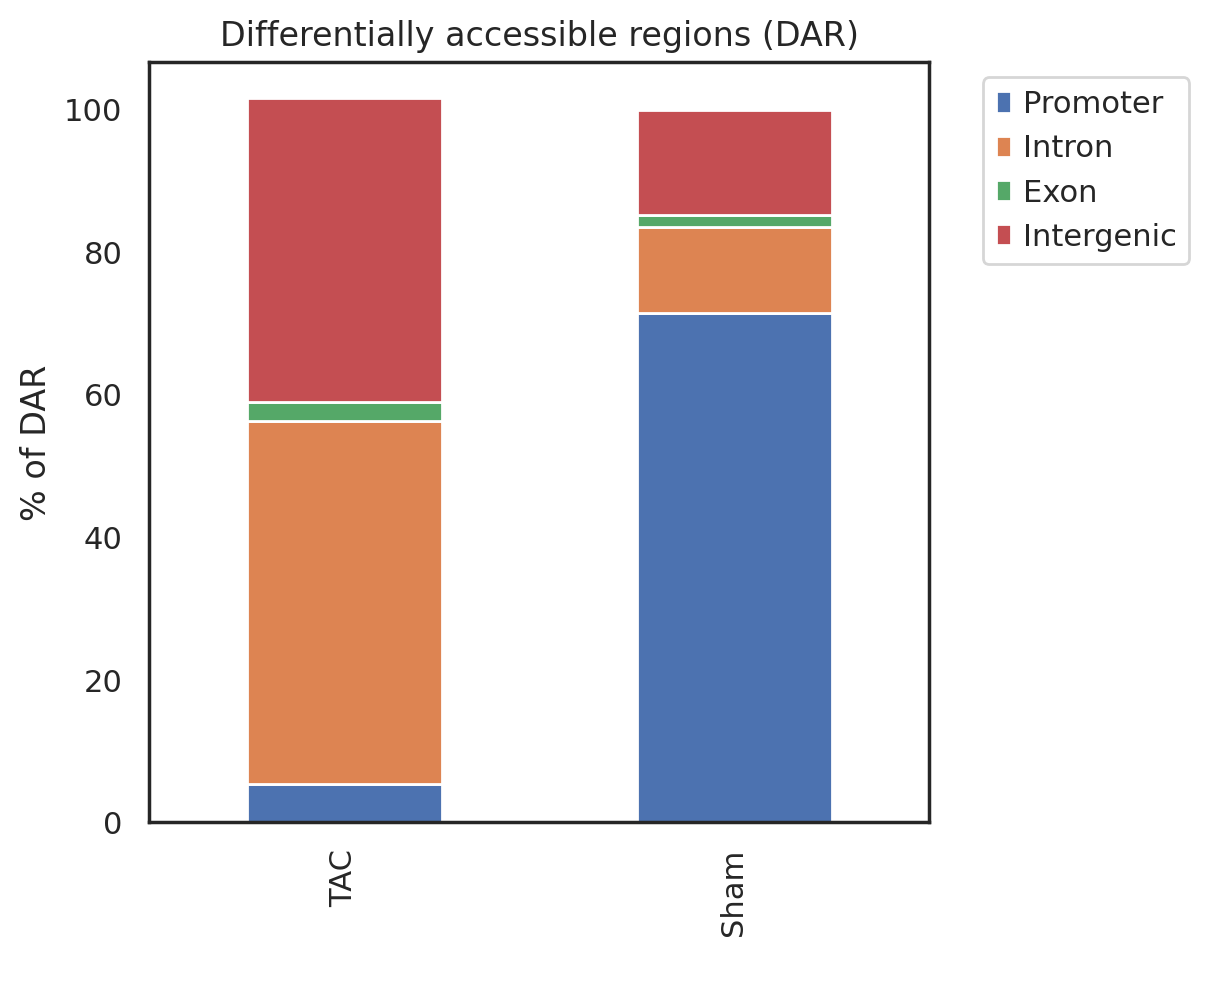

In [196]:
# create DataFrame
df = pd.DataFrame({'Promoter': [5.4,71.4],
                   'Intron': [50.8,12.1],
                   'Exon': [2.7,1.6],
                    'Intergenic': [42.6,14.7]},
                  index=['TAC','Sham'])


# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True)

# labels for x & y axis
plt.xlabel(' ')
plt.ylabel('% of DAR')

# title of plot
plt.title('Differentially accessible regions (DAR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('/home/lugli/spuccio/Projects/CNR002/figures/Relative_Frequency_DAR.pdf',format='pdf',bbox_inches="tight")